
<h1> DERIVING MEANINGFUL INSIGHTS FOR A CAB COMPANY INVESTMENT</h1>

<p>The goal is to help a XYZ firm to choose which company to invest in by finding the best cab company between the yellow cab and pink cab company and derive insights from four different data collected from 2016 to 2018 in US to acheive that.</p>

<ul>The data
<li>Cab_Data.csv – this file includes details of transaction for 2 cab companies</li>

<li>Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details</li>

<li>Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode</li>

<li>City.csv – this file contains list of US cities, their population and number of cab users</li>
</ul>

<p>This model is a comparative model that use insigths derived from data to find the best company to invest in.</p>

<br>

In [12]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sb
import xlrd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tabulate import tabulate
js = "<script>$('.output_scroll').removeClass('output_scroll')</script>"
display(HTML(js))


%matplotlib inline
sb.set_style("darkgrid")

### THE CITY DATASET

In [13]:
city=pd.read_csv("E:/mlprojects/notebook/data/City.csv")
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [14]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [15]:
#turning the columns users and population into  numeric
city['Users']=city['Users'].replace('"', '')
city['Population']=city['Population'].replace('"', '')

city['Users']=city['Users'].replace(',', '', regex=True).astype(int)
city['Population']=city['Population'].replace(',', '', regex=True).astype(int)

In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [17]:
# creating a new column to calculate the percentage of user per city

city['User %'] = (city['Users'] / 
                  city['Users'].sum()) * 100
city

,City,Population,Users,User %
0,NEW YORK NY,8405837,302149,23.414907
1,CHICAGO IL,1955130,164468,12.745377
2,LOS ANGELES CA,1595037,144132,11.169447
3,MIAMI FL,1339155,17675,1.369717
4,SILICON VALLEY,1177609,27247,2.111495
5,ORANGE COUNTY,1030185,12994,1.006964
6,SAN DIEGO CA,959307,69995,5.424232
7,PHOENIX AZ,943999,6133,0.475274
8,DALLAS TX,942908,22157,1.717047
9,ATLANTA GA,814885,24701,1.914193


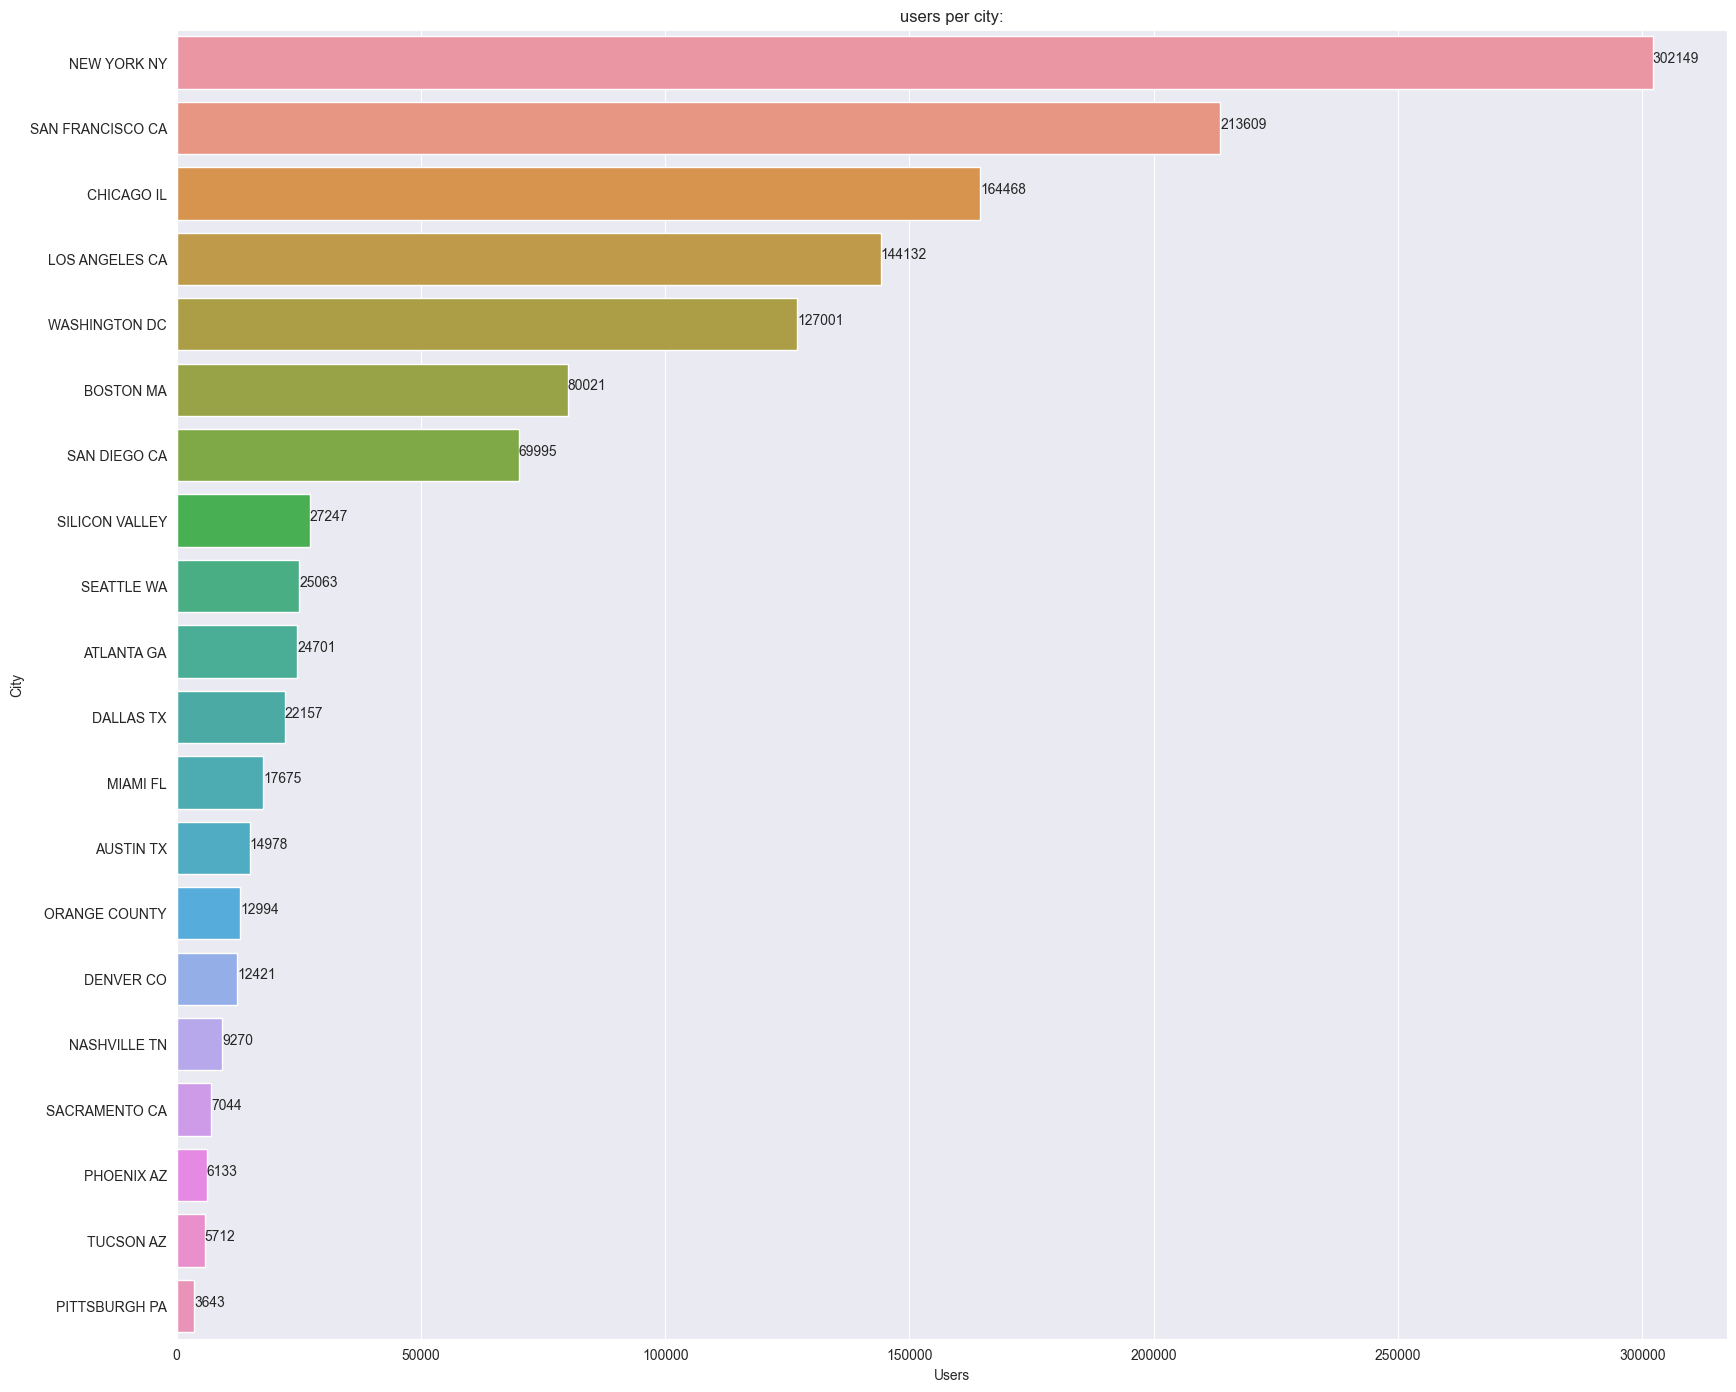

In [18]:
# checking users per city
users_per_city=pd.DataFrame(city.groupby("City")["Users"].sum().sort_values(ascending=False))
users_per_city.reset_index(inplace=True)

plt.figure(figsize=(20, 17));
g=sb.barplot(x="Users", y="City", data=users_per_city);
for i, v in enumerate(users_per_city.Users):
    g.text(v, i, str(int(v)))
plt.title('users per city:');

New York city is the most populated city in term of users from both companies. NY has the highest number of cab users followed by San Francisco, chicago etc.

<Axes: title={'center': ' USER PRESENCE CITY WISE'}, ylabel='Users'>

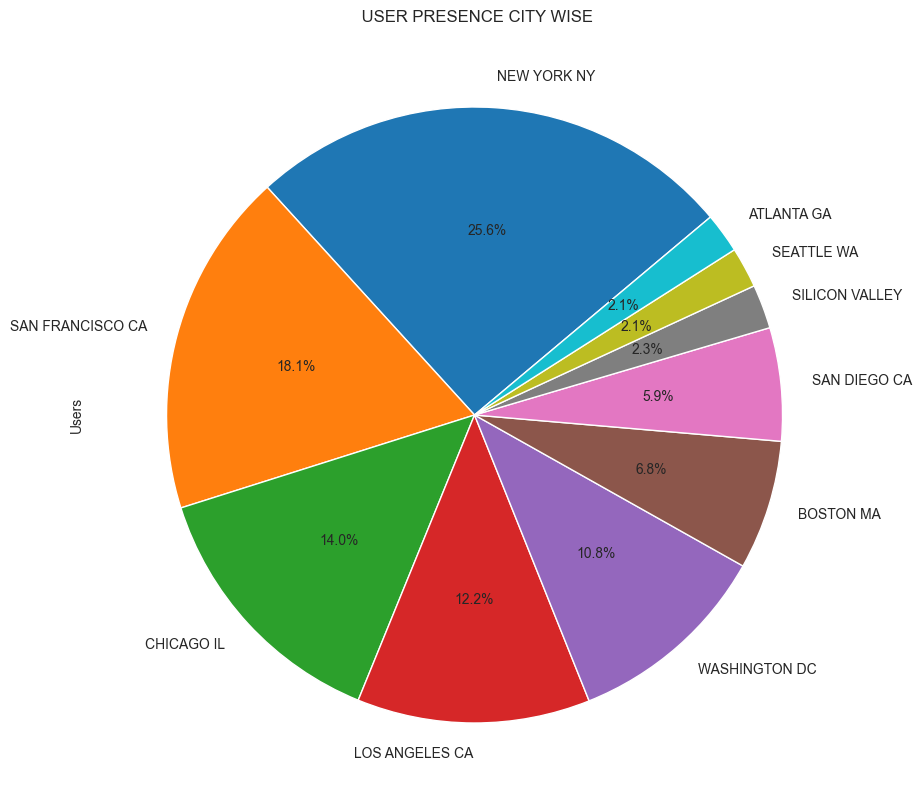

In [19]:
# city by users
plt.title(" USER PRESENCE CITY WISE")
city.groupby("City")["Users"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

The chart above shows the top 10 city with the highest number of cab  users which are: NEW YORK NY ,SAN FRANCISCO CA,CHICAGO IL,LOS ANGELES CA,WASHINGTON DC,BOSTON MA,SAN DIEGO CA,SILICON VALLEY,SEATTLE WA,ATLANTA GA.

<br>

### THE CAB DATASET

In [20]:
cab=pd.read_csv("E:/mlprojects/notebook/data/Cab_Data.csv")
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [21]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [22]:
print("the cab dataset shape: ",cab.shape)

the cab dataset shape:  (359392, 7)


In [23]:
cab.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [24]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

No missing data in the cab dataset

<br>

### THE TRANSACTION DATASET

In [25]:
trans_data=pd.read_csv("E:/mlprojects/notebook/data/Transaction_ID.csv")
trans_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [26]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [27]:
print("Thetransaction dataset shape: ",trans_data.shape)

Thetransaction dataset shape:  (440098, 3)


In [28]:
trans_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,1.022006e+07,127045.493722,10000011.0,10110035.25,10220059.5,10330083.75,10440108.0
Customer ID,440098.0,2.361951e+04,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


In [29]:
trans_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

No missing data in the transaction data

In [30]:
# PERFORMING INNER JOIN ON THE TRNSACTION DATASET AND CAB DATASET ON TRANSACTION ID

trans_cab_data = pd.merge(trans_data, cab, on=["Transaction ID"])
trans_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,53286,Cash,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,52265,Cash,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,52175,Card,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [31]:
trans_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Customer ID     359392 non-null  int64  
 2   Payment_Mode    359392 non-null  object 
 3   Date of Travel  359392 non-null  int64  
 4   Company         359392 non-null  object 
 5   City            359392 non-null  object 
 6   KM Travelled    359392 non-null  float64
 7   Price Charged   359392 non-null  float64
 8   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 27.4+ MB


In [32]:
print("The transaction combined with cab dataset shape: ",trans_cab_data.shape)

The transaction combined with cab dataset shape:  (359392, 9)


<br>

### THE CUSTOMER DATASET

In [33]:
customer_data=pd.read_csv("E:/mlprojects/notebook/data/Customer_ID.csv")
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [34]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [35]:
print("The customer dataset shape: ",customer_data.shape)

The customer dataset shape:  (49171, 4)


In [36]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


In [37]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

No missing data in the customer dataset

In [38]:
# PERFORMING INNER JOIN ON THE TRANS_CAB DATASET AND CUSTOMER DATASET ON 


Global_cab_data= pd.merge(trans_cab_data, customer_data, on=["Customer ID"])
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454


<br>

# THE GLOBAL CAB DATA

In [39]:
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454


In [40]:
print("The global cab data shape:",Global_cab_data.shape)

The global cab data shape: (359392, 12)


In [41]:
Global_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB


In [42]:
Global_cab_data[Global_cab_data.duplicated()]

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)


No duplicate rows data

In [43]:
Global_cab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Customer ID,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Age,359392.0,3.533670e+01,12.594234,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00


### DATA VISULIZATION AND FEATURE ENGINEERING ON GLOBAL CAB DATASET

In [44]:
# visualizing the number of pink and yellow cab users

plt.figure(figsize=(10,5))
sb.countplot(Global_cab_data.Company)
plt.title(" CAB COMPANY ")
plt.show()

ValueError: could not convert string to float: 'Pink Cab'

<Figure size 1000x500 with 0 Axes>

In [85]:
Global_cab_data.dtypes

Transaction ID                 int64
Customer ID                    int64
Payment_Mode                  object
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Gender                        object
Age                            int64
Income (USD/Month)             int64
Profit                       float64
Age group                   category
Income grouped              category
Travel_year_Month          period[M]
Travel_year                    int64
Travel_month                   int64
KM_grouped                  category
dtype: object

From 2016 to 2018, most cab users travelled with Yellow Cab company

In [46]:
# creating a new colum which is the difference between the price charged and the actual cost of trip

Global_cab_data['Profit']=Global_cab_data['Price Charged']-Global_cab_data['Cost of Trip']
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600


In [47]:
# lets group customer's age

labels = ["{0} - {1}".format(i, i + 9) for i in range(10, 70, 10)]

Global_cab_data["Age group"] = pd.cut(Global_cab_data.Age, range(10,75, 10), right=False, labels=labels)
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29


In [ ]:
plt.figure(figsize=(12,7))
sb.countplot(Global_cab_data["Age group"])
plt.show()

Most cab users are between the age of 20 to 39

In [48]:
def plot_figure2(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.bar(stacked = True, figsize = (x,y),width=0.5)
    xt = plt.xticks(rotation=0)
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
#         width=width*5
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

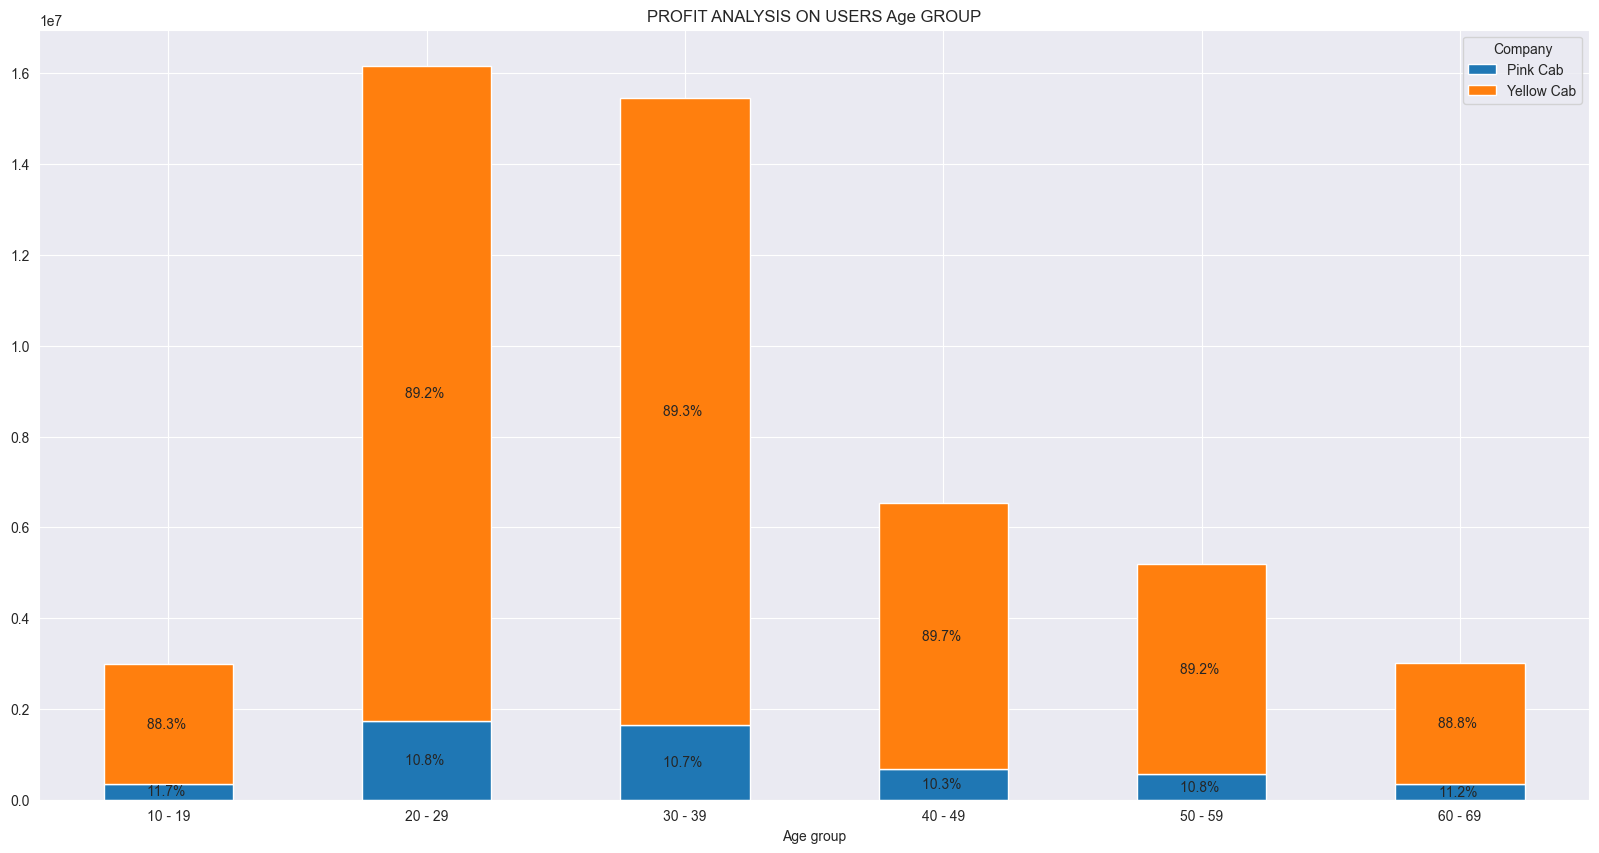

In [49]:
pivot_age_profit = Global_cab_data.pivot_table(index = ["Age group"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure2(pivot_age_profit, "PROFIT ANALYSIS ON USERS Age GROUP",0.45,20,10)

C:\Users\RAAHUL\AppData\Local\Temp\ipykernel_11564\4210926998.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Global_cab_data['Income (USD/Month)'])


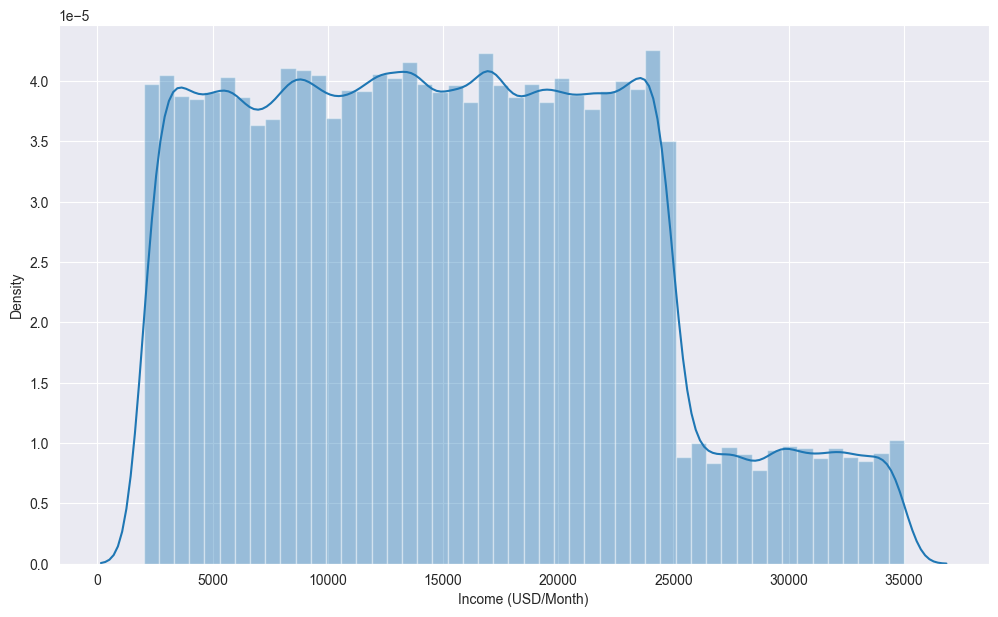

In [50]:
#INCOME DO SOMETHING

plt.figure(figsize=(12,7))
sb.distplot(Global_cab_data['Income (USD/Month)'])
plt.show()

Most users have an income that ranges from 2000 to 24000

In [51]:
labelz = ["{0} - {1}".format(i, i + 3000) for i in range(2000, 35000, 5000)]

Global_cab_data["Income grouped"] = pd.cut(Global_cab_data['Income (USD/Month)'], range(2000,40000, 5000), right=False, labels=labelz)
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000


In [95]:
Global_cab_data.dtypes

Transaction ID                 int64
Customer ID                    int64
Payment_Mode                  object
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Gender                        object
Age                            int64
Income (USD/Month)             int64
Profit                       float64
Age group                   category
Income grouped              category
Travel_year_Month          period[M]
Travel_year                    int64
Travel_month                   int64
KM_grouped                  category
dtype: object

In [92]:
# visualizing the IMCOME 

plt.figure(figsize=(12,7))
sb.countplot(Global_cab_data["Income grouped"],palette="tab10")
plt.title("Income Distribution ")
plt.show()

ValueError: could not convert string to float: '7000 - 10000'

<Figure size 1200x700 with 0 Axes>

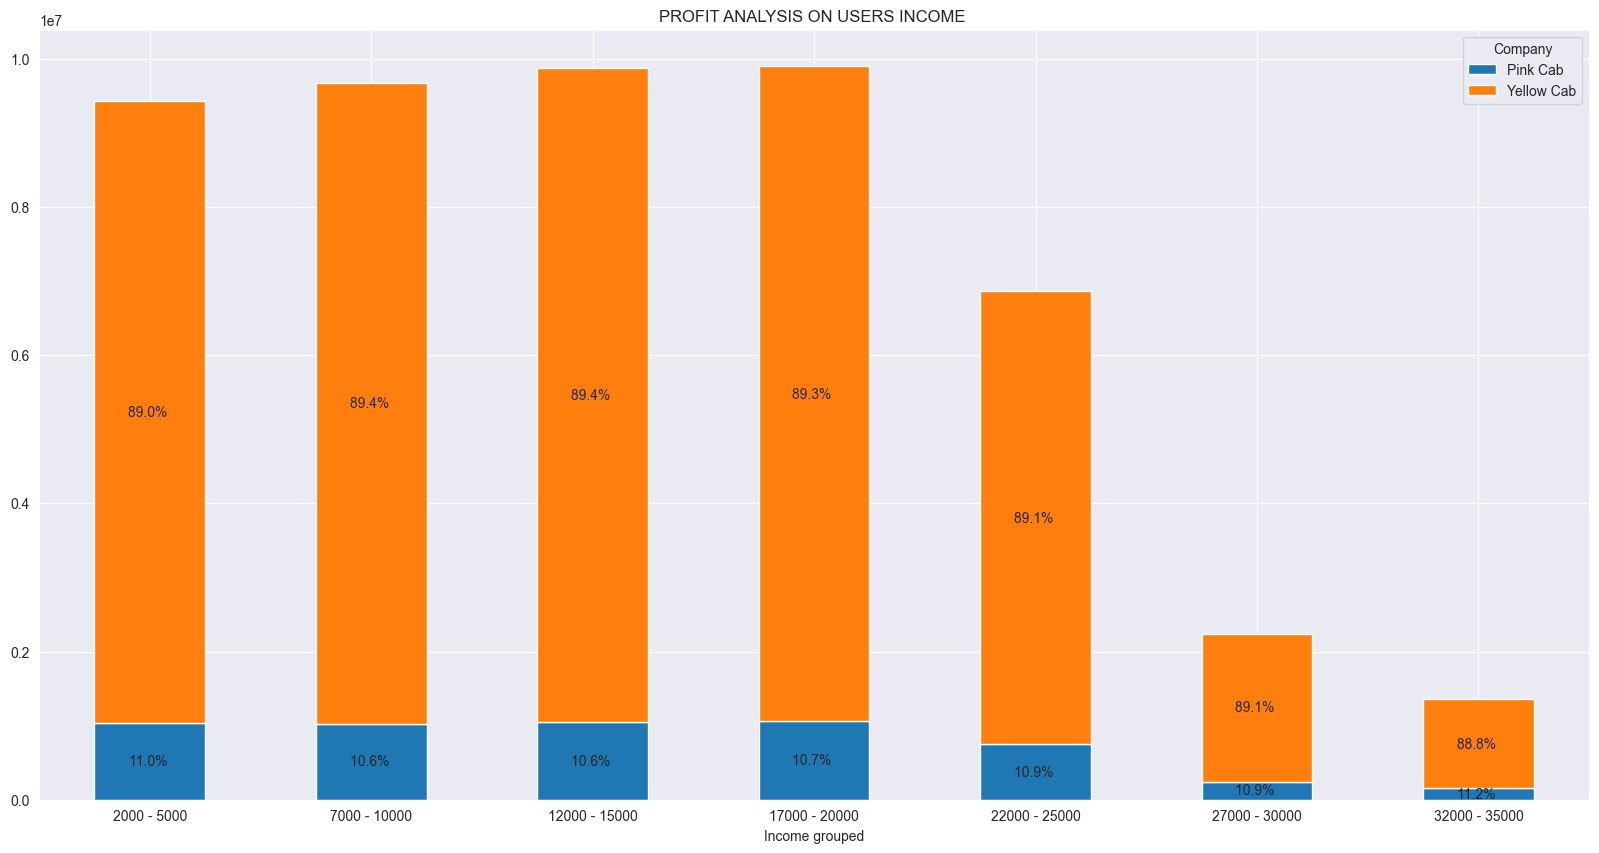

In [53]:
pivot_income_profit = Global_cab_data.pivot_table(index = ["Income grouped"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure2(pivot_income_profit, "PROFIT ANALYSIS ON USERS INCOME ",0.45,20,10)

Yellow cab company made more profit based on users income

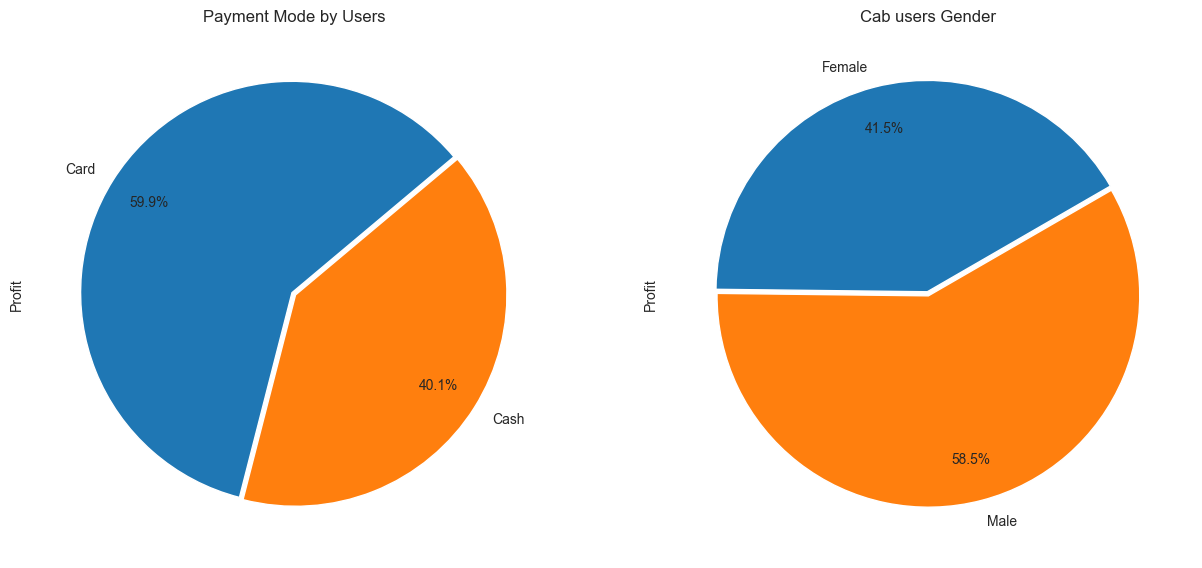

In [54]:
# customer payment mode and gender visualization


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Payment Mode by Users')
Global_cab_data.groupby('Payment_Mode')['Profit'].sum().plot(kind='pie',y='Payment_Mode',startangle=40,figsize=(15,7),autopct='%1.1f%%',explode=[0.01]*2,pctdistance=0.8)

plt.subplot(1,2,2)
plt.title('Cab users Gender')
Global_cab_data.groupby('Gender')['Profit'].sum().plot(kind='pie',y='GENDER',startangle=30,figsize=(15,7),autopct='%1.1f%%',explode=[0.01]*2,pctdistance=0.8)
plt.show()

Most cab users are male, they are 57.3% of the total user and prefer paying with Card which represent 60% .

C:\Users\RAAHUL\AppData\Local\Temp\ipykernel_11564\2265883711.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Global_cab_data['Price Charged'])
C:\Users\RAAHUL\AppData\Local\Temp\ipykernel_11564\2265883711.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Global_cab_data['Cost of Trip'])


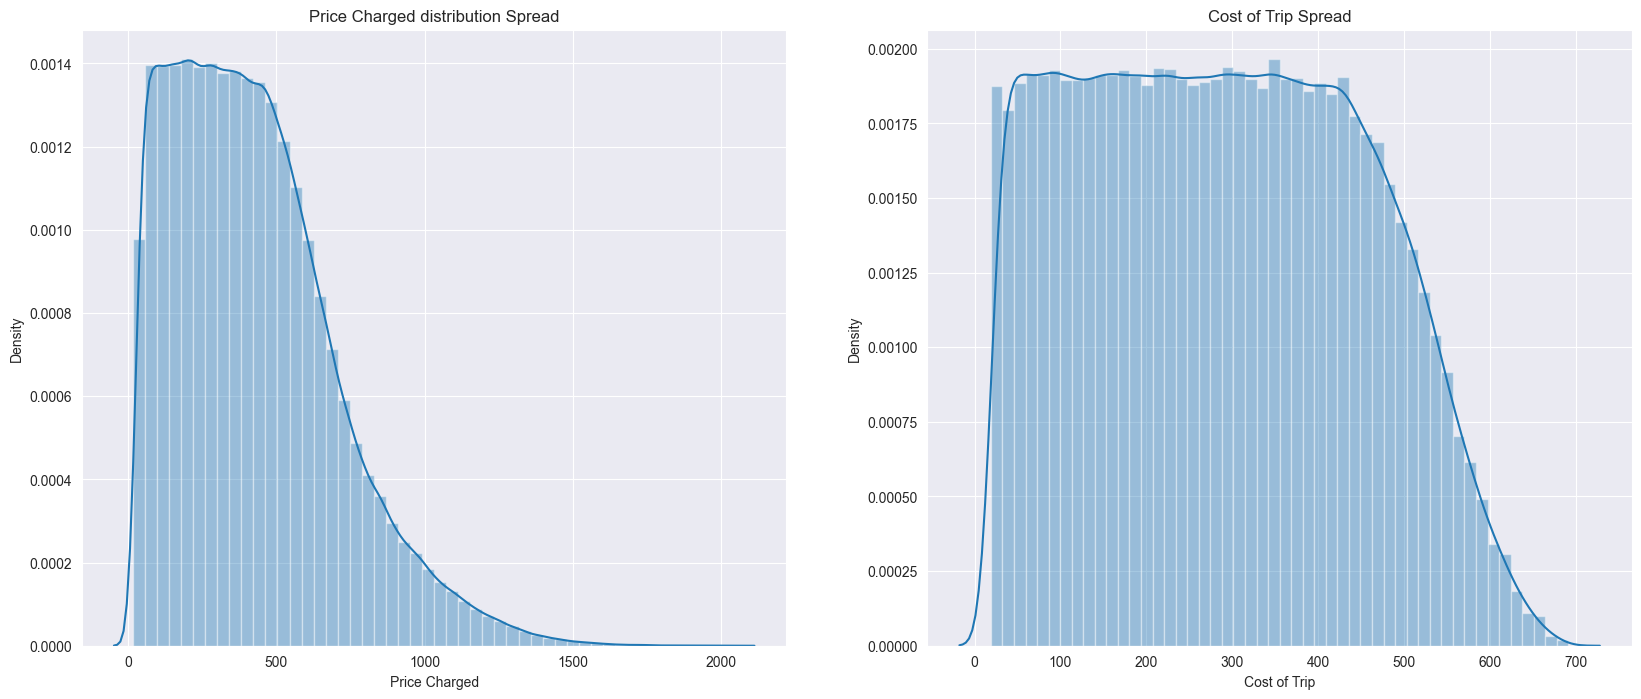

In [55]:
#data visualization of the prices from the global data set

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Charged distribution Spread')
sb.distplot(Global_cab_data['Price Charged'])

plt.subplot(1,2,2)
plt.title('Cost of Trip Spread')
sb.distplot(Global_cab_data['Cost of Trip'])
plt.show()

This distributions show that there is a clear difference between the actual cost of trip and the priced charged by both companies.<br>
There is presence of outliers in the distributions.

C:\Users\RAAHUL\AppData\Local\Temp\ipykernel_11564\798390849.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Global_cab_data['Profit'])


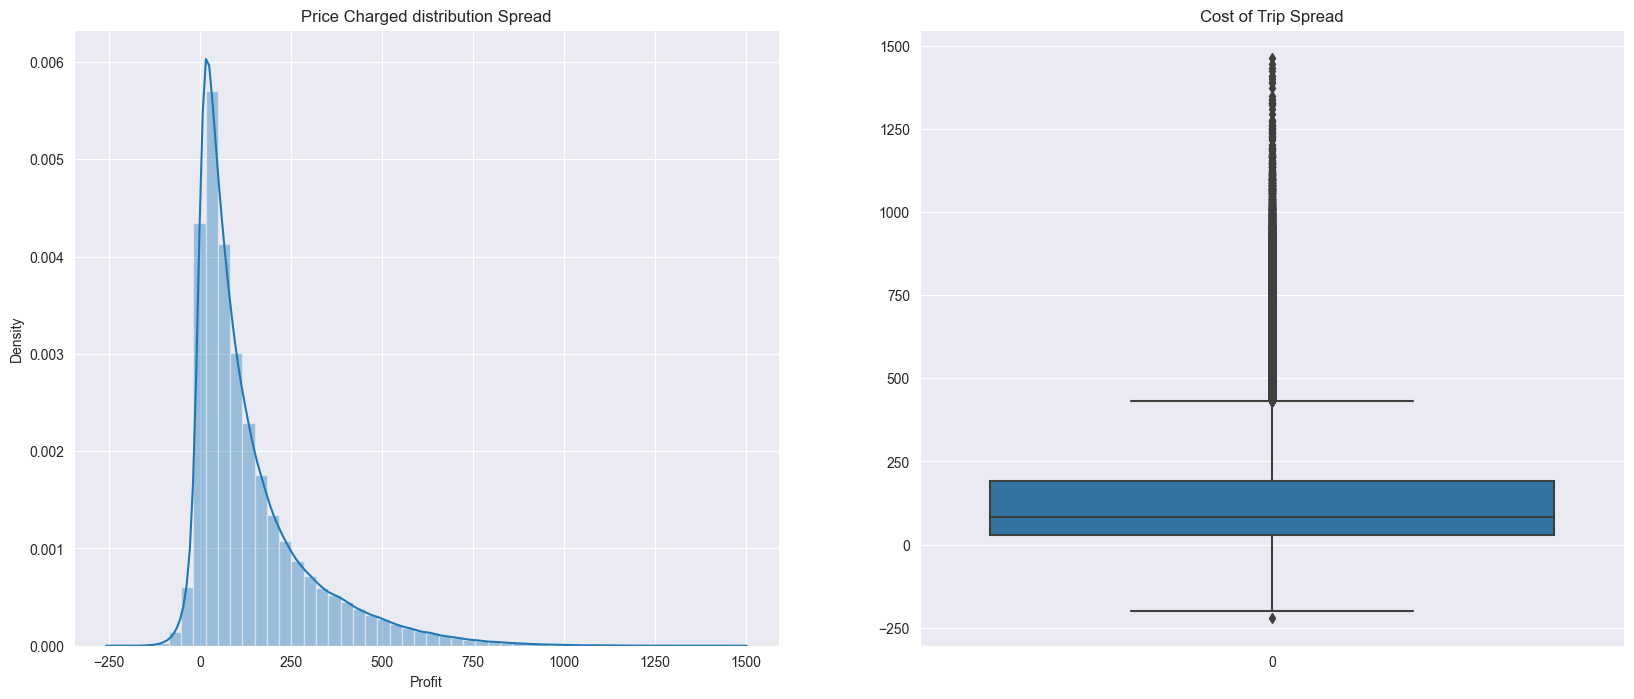

In [56]:
#visualization of the profit from the global data set

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Charged distribution Spread')
sb.distplot(Global_cab_data['Profit'])

plt.subplot(1,2,2)
plt.title('Cost of Trip Spread')
sb.boxplot(Global_cab_data['Profit'])
plt.show()

There is presence of outliers in the distributions.

<Axes: title={'center': ' PROFIT PER COMPANY '}, ylabel='Profit'>

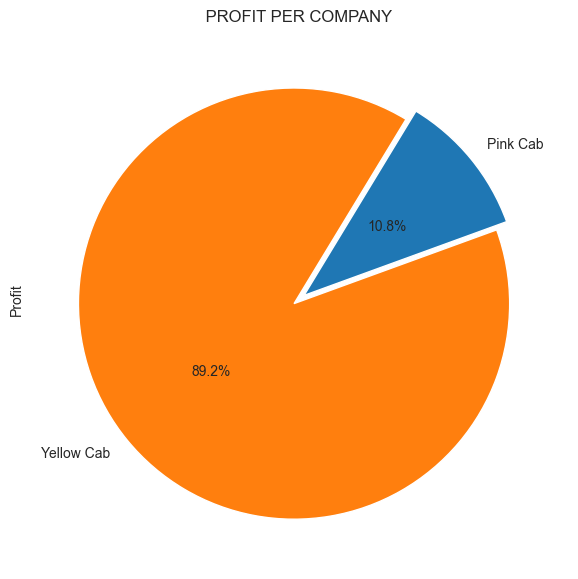

In [57]:
# Profit per company
plt.title(" PROFIT PER COMPANY ")
Global_cab_data.groupby('Company')['Profit'].sum().plot(kind='pie',y='Company',startangle=20,figsize=(15,7),autopct='%1.1f%%',explode=[0.03]*2,pctdistance=0.5)

Yellow cab Company made 89.2% of the total profit 

In [58]:
# changing the Ms excel serial number into real Date

Global_cab_data['Date of Travel'] = Global_cab_data['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))


# Extracting the month and year from the travel date column and year column

Global_cab_data['Travel_year_Month'] = pd.to_datetime(Global_cab_data['Date of Travel']).dt.to_period('M')
Global_cab_data['Travel_year']=pd.DatetimeIndex(Global_cab_data['Date of Travel']).year
Global_cab_data['Travel_month']=pd.DatetimeIndex(Global_cab_data['Date of Travel']).month
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000,2016-01,2016,1
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07,2018,7
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11,2018,11
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000,2016-01,2016,1
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01,2018,1
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01,2018,1
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01,2018,1
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01,2018,1


In [59]:
# Visualizing the profit by year and month

plt.figure(figsize=(20,10))
ax=sb.barplot(Global_cab_data['Travel_month'],Global_cab_data['Profit'],hue="Company",data=Global_cab_data)
# xt = plt.xticks(rotation=70)
plt.title("PROFIT PER MONTH")
plt.show()

TypeError: barplot() got multiple values for argument 'data'

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

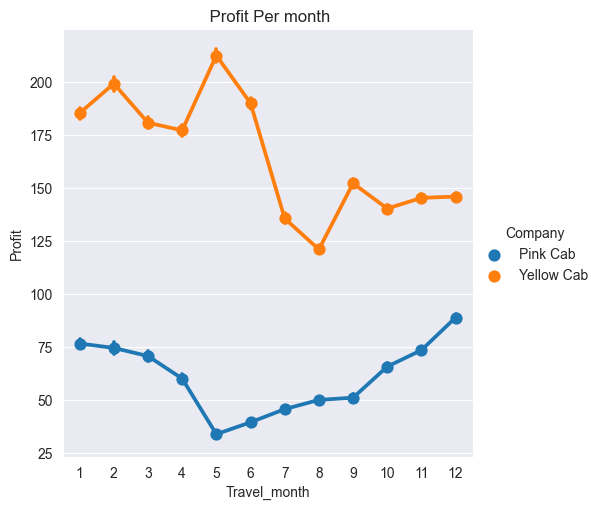

In [60]:
plt.figure(figsize=(20,10))
sb.catplot(x="Travel_month",
            y="Profit",
            hue="Company",
            kind="point", 
            data=Global_cab_data)
plt.title(" Profit Per month")

plt.show()

In [61]:
plt.figure(figsize=(20,10))
sb.countplot(Global_cab_data['Travel_month'],hue="Company",data=Global_cab_data)
plt.title("RIDES PER MONTH")

TypeError: countplot() got multiple values for argument 'data'

<Figure size 2000x1000 with 0 Axes>

In [62]:
def plot_figure3(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
#     ax.xticks(rotation=30)
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label =  " " + str(pivot_table.loc[i][j].astype('int64')) + ""
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

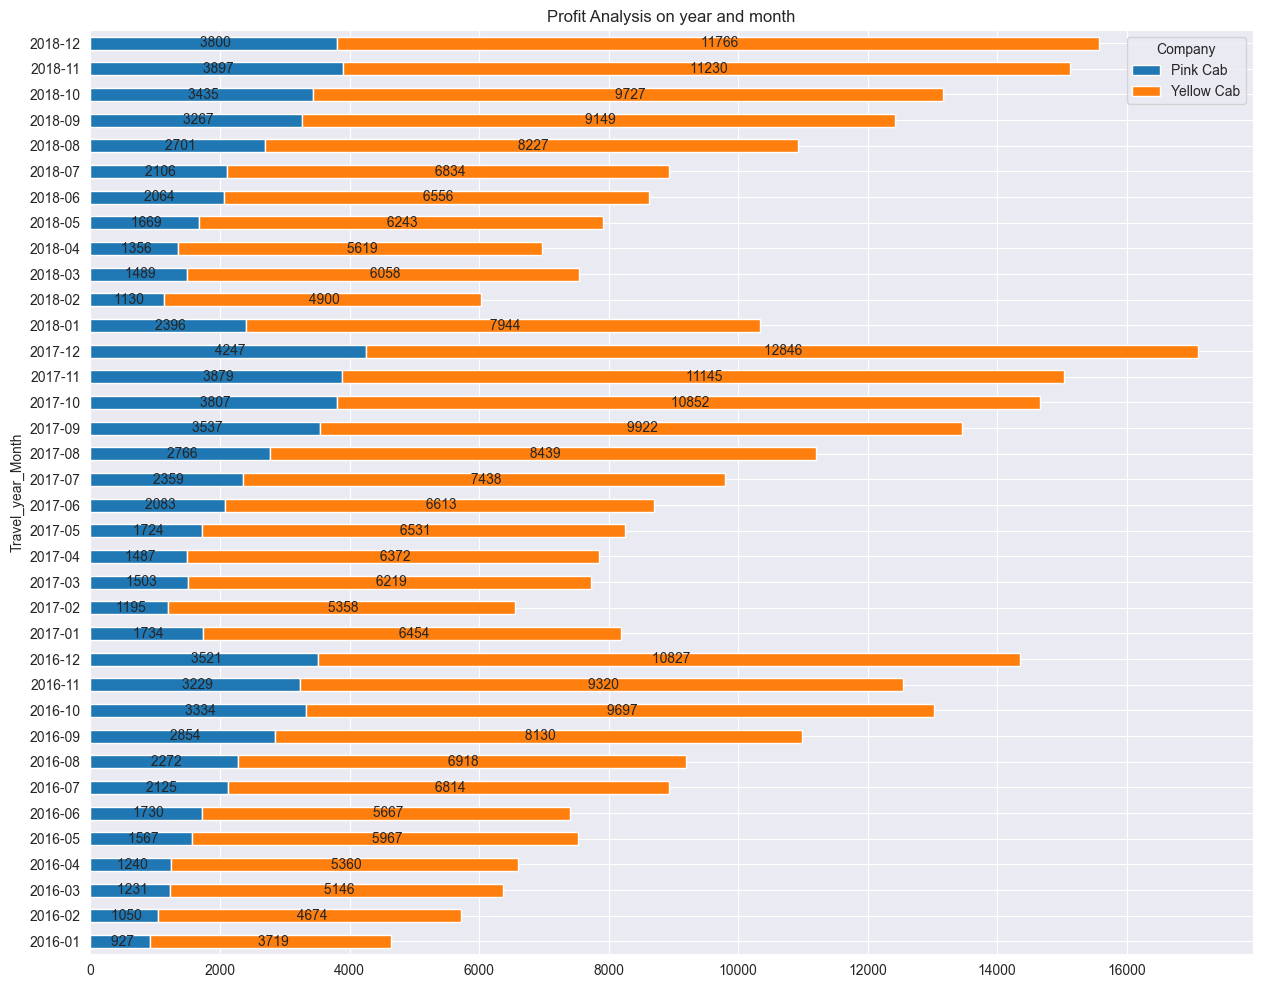

In [63]:
Travel_yearMonth_data = Global_cab_data.pivot_table(index = ['Travel_year_Month'], columns = 'Company', values = 'Profit', aggfunc = 'count')
plot_figure3(Travel_yearMonth_data, "Profit Analysis on year and month",15,15,12)

The profit gained by both companies is high at the end of each year

In [64]:
#a function

def plot_figure(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

In [ ]:
pivot_year_profit = Global_cab_data.pivot_table(index = ['Travel_year'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure(pivot_year_profit, "PROFIT ANALYSIS PER YEAR",10,15,8)

This chart allow us to see that each year, Yellow cab comapny makes closely 90% of the total profit of both companies

In [ ]:
# KM TRAVELLED AND  and PRICE CHARGED

plt.figure(figsize=(20,7))
sb.lineplot(Global_cab_data['KM Travelled'],Global_cab_data['Price Charged'],hue="Company",data=Global_cab_data)
plt.title("PROFIT PER KM TRAVELLED")

The longer the KM travelled the higher the price charges from both company howerver the Yellow cab company charged higher than the Pink cab company

In [65]:
# lets group the KM traveled

label = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]

Global_cab_data["KM_grouped"] = pd.cut(Global_cab_data['KM Travelled'], range(0,55, 10), right=False, labels=label)
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month,KM_grouped
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000,2016-01,2016,1,30 - 39
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07,2018,7,20 - 29
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11,2018,11,40 - 49
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000,2016-01,2016,1,20 - 29
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04,2018,4,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01,2018,1,10 - 19
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01,2018,1,10 - 19
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01,2018,1,10 - 19
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01,2018,1,0 - 9


In [66]:
# visualizing the KM counts

plt.figure(figsize=(20,10))
sb.countplot(Global_cab_data['KM_grouped'], hue='Company',data=cab)
# xt = plt.xticks(rotation=70)
plt.title("KM travelled per rides")
plt.show()

TypeError: countplot() got multiple values for argument 'data'

<Figure size 2000x1000 with 0 Axes>

Most users take a trip of 10 to 39 km

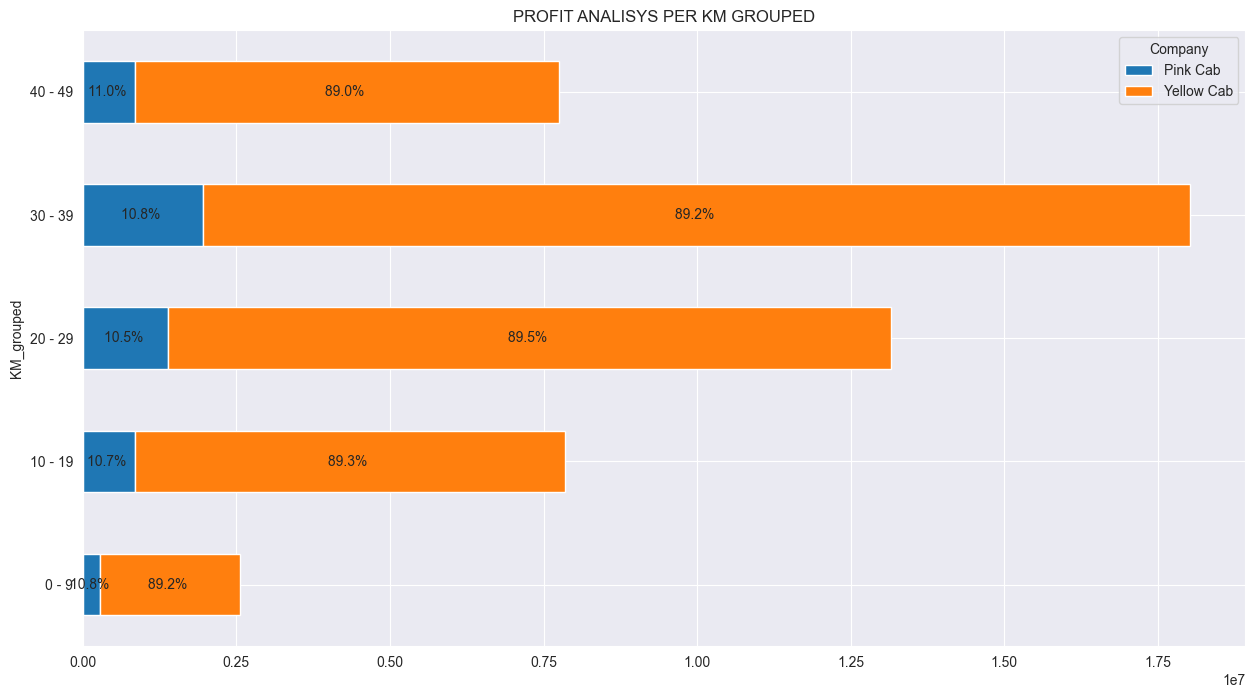

In [67]:
pivot_KM_profit = Global_cab_data.pivot_table(index = ['KM_grouped'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure(pivot_KM_profit, "PROFIT ANALISYS PER KM GROUPED",10,15,8)

This chart represents the number of Km travelled registed from yellow cab and Pink cab company.
Most users took a ride of 10 to 30 KM and 76% users choose Yellow cab  and  only 24% travelled with Pink cab company, from where the yellow cab made more profit compared to the other.

<Axes: ylabel='Profit'>

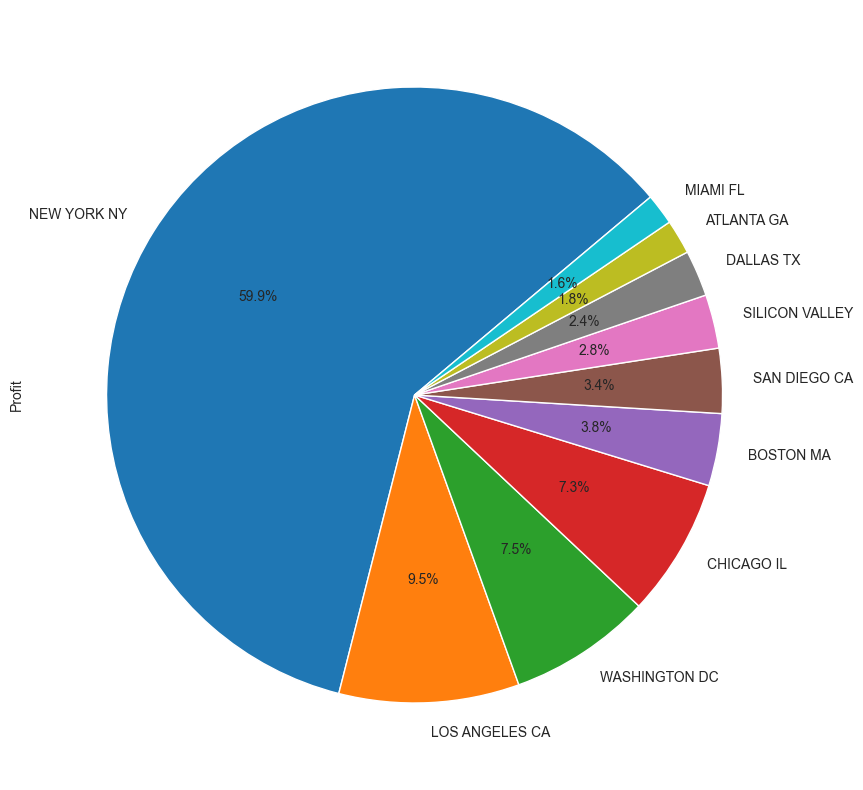

In [68]:
# TOP 10 CITIES WITH THE MOST PROFIT

Global_cab_data.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

New York city has 60%  of all the companies profit, it is the city with the highest number of users.

In [69]:
# visualizing the difference between the city and the price charged made by the companies


plt.figure(figsize=(20,10))
sb.barplot(Global_cab_data['City'],Global_cab_data['Price Charged'], hue='Company',data=Global_cab_data)
xt = plt.xticks(rotation=70)
plt.title("PROFIT PER CITY")
plt.show()

TypeError: barplot() got multiple values for argument 'data'

<Figure size 2000x1000 with 0 Axes>

Yello Cab company charges higher than the Pink Cab company in all cities, pink Cab profit looks constant and ranges from 290 to 370 while The yellow cab charges higher in populated city in terms of users and has an insonstant profit that ranges wider.

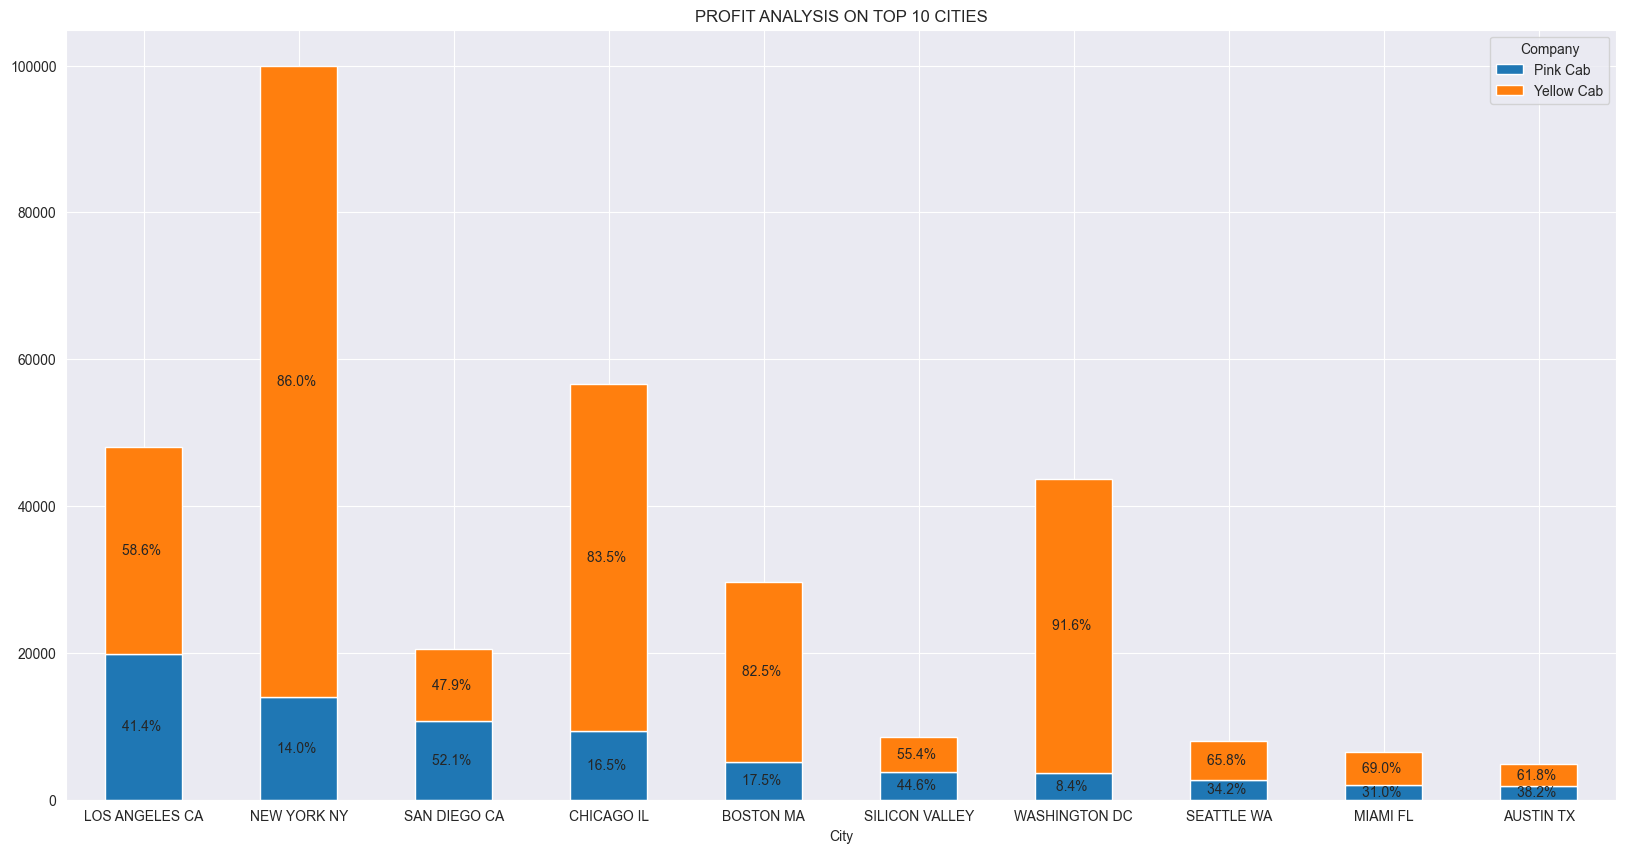

In [70]:
# TOP 10 CITIES IN TERMS OF PROFIT

pivot_city_profit = Global_cab_data.pivot_table(index = ['City'], columns = 'Company', values = 'Profit', aggfunc = 'count')
pivot_city_profit=pivot_city_profit.sort_values("Pink Cab",ascending=False).head(10)
plot_figure2(pivot_city_profit, "PROFIT ANALYSIS ON TOP 10 CITIES",0.45,20,10)


The comapanies made profit from the most populated city in terms of cab users but Yellow cab company made more profit in the top 10 cities with the most users.

In [71]:
# let's take a look at the users

Global_cab_data['Customer ID'].value_counts().head(5)

494     54
2939    53
2766    51
1070    51
858     50
Name: Customer ID, dtype: int64

The series above is the the top 5  cab users customer ID and the number of time they travelled with either yellow or pink cab

In [72]:
# EXtracting top5  users data

top_user=Global_cab_data['Customer ID'].isin(['494','2939','1070','2766','858'])
Top5_user_data=Global_cab_data[top_user]

Top5_user_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month,KM_grouped


In [73]:
# Visualizing top 5 users prefered company

plt.figure(figsize=(15,7))
sb.countplot(Top5_user_data['Customer ID'], hue='Company',data=Top5_user_data,palette="Oranges_r")
plt.title("TOP 5 USERS COMPANY DISTRIBUTION")

plt.show()

TypeError: countplot() got multiple values for argument 'data'

<Figure size 1500x700 with 0 Axes>

The top 5 cab users mostly travelled with Yellow cab, as shown above they used Yellow cab more than 40 times in 50 rides.

<br>

## THE PINK CAB COMPANY DATA

In [74]:
# Pink Cab Profit Margin
Pink_cab_data=Global_cab_data[Global_cab_data['Company']=="Pink Cab"]
Pink_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month,KM_grouped
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,57.315,20 - 29,7000 - 10000,2016-01,2016,1,30 - 39
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,23.666,20 - 29,7000 - 10000,2016-01,2016,1,20 - 29
6,10395626,27703,Card,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,Male,27,9237,25.096,20 - 29,7000 - 10000,2018-10,2018,10,10 - 19
7,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,27.568,50 - 59,7000 - 10000,2016-01,2016,1,0 - 9
11,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,25.798,20 - 29,22000 - 25000,2016-01,2016,1,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359331,10437193,47760,Card,2018-01-05,Pink Cab,SACRAMENTO CA,31.03,436.06,344.433,Male,47,8823,91.627,40 - 49,7000 - 10000,2018-01,2018,1,30 - 39
359332,10437278,18620,Card,2018-01-02,Pink Cab,SAN DIEGO CA,26.73,343.83,304.722,Male,27,2876,39.108,20 - 29,2000 - 5000,2018-01,2018,1,20 - 29
359333,10437570,14974,Cash,2018-01-05,Pink Cab,SILICON VALLEY,22.23,386.13,264.537,Male,51,8020,121.593,50 - 59,7000 - 10000,2018-01,2018,1,20 - 29
359334,10437576,41135,Card,2018-01-05,Pink Cab,TUCSON AZ,35.96,461.77,381.176,Female,24,14269,80.594,20 - 29,12000 - 15000,2018-01,2018,1,30 - 39


In [75]:
# Yellow Cab Revenue

PC_income=Pink_cab_data['Profit'].sum()
print("The Income of the Pink cab comapny is : ",round(PC_income,2))

The Income of the Pink cab comapny is :  5307328.32


In [76]:
PC_Gross_margin=(Pink_cab_data['Price Charged'].sum()-Pink_cab_data['Cost of Trip'].sum())/Pink_cab_data['Price Charged'].sum()*100
print("The margin of the Pink cab campany is : ",round(PC_Gross_margin,2))

The margin of the Pink cab campany is :  20.16


In [77]:
# profit per ride
PC_profit_per_ride=Pink_cab_data['Profit'].sum()/len(Pink_cab_data['KM Travelled'])
print(" Pink cab campany Profit per ride is : ",round(PC_profit_per_ride,2))

 Pink cab campany Profit per ride is :  62.65


<br>

## THE YELLOW CAB DATA

In [78]:
# Yellow Cab Profit Margin

Yellow_cab_data=Global_cab_data[Global_cab_data['Company']=="Yellow Cab"]
Yellow_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month,KM_grouped
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07,2018,7,20 - 29
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11,2018,11,40 - 49
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04,2018,4,30 - 39
5,10324737,27703,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,50.8912,20 - 29,7000 - 10000,2018-05,2018,5,0 - 9
8,10079404,28712,Card,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,210.0920,50 - 59,7000 - 10000,2016-09,2016,9,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01,2018,1,10 - 19
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01,2018,1,10 - 19
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01,2018,1,10 - 19
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01,2018,1,0 - 9


In [79]:
# Yellow Cab Revenue

YC_income=Yellow_cab_data['Profit'].sum()
print("The Income of the Yellow cab comapny is : ",round(YC_income,2))

The Income of the Yellow cab comapny is :  44020373.17


In [80]:
YC_Gross_margin=(Yellow_cab_data['Price Charged'].sum()-Yellow_cab_data['Cost of Trip'].sum())/Yellow_cab_data['Price Charged'].sum()*100
print("The margin of the Yellow cab campany is : ",round(YC_Gross_margin,2))

The margin of the Yellow cab campany is :  34.98


In [81]:
# profit per ride
YC_profit_per_ride=Yellow_cab_data['Profit'].sum()/len(Yellow_cab_data['KM Travelled'])
print(" Yellow cab campany Profit per ride is : ",round(YC_profit_per_ride,2))

 Yellow cab campany Profit per ride is :  160.26


In [82]:
# comparative table

table = [['Company','margin', 'Profit', 'Rides', 'Profit Per Rides'],
        ['Yellow Cab',round(YC_Gross_margin,2),round(YC_income,2),274681, round(YC_profit_per_ride,2)],
        ['Pink cab',round(PC_Gross_margin,2), round(PC_income,2),84711,  round(PC_profit_per_ride,2) ]]


display(HTML(tabulate(table, tablefmt = 'html')))

Company,margin,Profit,Rides,Profit Per Rides
Yellow Cab,34.98,44020373.17,274681,160.26
Pink cab,20.16,5307328.32,84711,62.65


<br>

# CONCLUSION

<p>We have evaluated both cab companies on the following points and found Yellow cab better than Pink cab:</p>

<ul>
<li>Most Users prefer travelling with Yellow cab than Pink cab</li>
<li>Users tarvelled mostly with Yellow cab on short and long distance trip</li>
<li>Yellow cab company charged more in populated City which is a good strategy and increase its profit </li>
<li>Yellow cab owns 89% of the total profit made by both companies</li>
<li>Yellow cab has 90% of total profit each year</li>
<li>Yellow cab charged higher than Pink cab</li>
</ul>

<p>We will advise the XYZ company to invest in Yellow Cab company for its glorious benefit.</p>